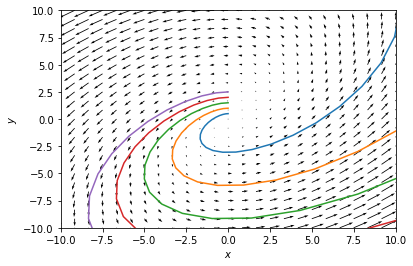

lambda 1:  (0.5+0.8660254037844385j)
lambda 2:  (0.5-0.8660254037844385j)


In [6]:
# ANALISIS BIDANG FASA

# 5.1 BIDANG FASA
# menggambar bidang fasa untuk sistem dengan A = [[0,-1],[1,0]] dan
# beberapa kurva solusi dengan syarat awal x(0) = 0 dan y(0) = 0, 0.5, ... , 2.5
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
#menggambar bidang fasa
x = np.linspace(-10,10,25)
y = np.linspace(-10,10,25)
x,y = np.meshgrid(x,y)
plt.quiver(x,y,x-y,x)
plt.xlabel('$x$')
plt.ylabel('$y$')

#menggambar beberapa kurva solusi
def model(U,t):
    x,y = U
    dxdt = x-y
    dydt = x
    return [dxdt,dydt]

for i in [0.5,1,1.5,2,2.5]:
    tspan = np.linspace(0, 50, 200)
    z0 = [0,i]
    ys = odeint(model, z0, tspan)
    plt.plot(ys[:, 0],ys[:, 1]);
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.show()


# Initial conditions
A = np.array([[1,-1],[1,0]])

# evaluate the eigen values 
eigval, eigvec = np.linalg.eig(A)
lambda1 = eigval[0]
lambda2 = eigval[1]
print("lambda 1: ",lambda1)
print("lambda 2: ",lambda2)

lambda 1:  2.0
lambda 2:  -1.0
0.666666666666667*exp(2.0*t) + 0.333333333333333*exp(-1.0*t)
0.333333333333333*exp(2.0*t) + 0.666666666666667*exp(-1.0*t)


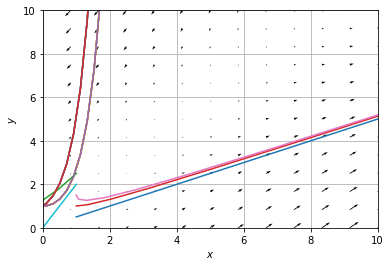

In [28]:

# packages yang digunakan 
import numpy as np
from sympy import *


# Initial conditions
A = np.array([[3,-2],[2,-2]])
x0 = 1
y0 = 1

# evaluate the eigen values 
eigval, eigvec = np.linalg.eig(A)
lambda1 = eigval[0]
lambda2 = eigval[1]
print("lambda 1: ",lambda1)
print("lambda 2: ",lambda2)

# evaluate the eigen values
x1 = eigvec[:,0].reshape(2,1)
x2 = eigvec[:,1].reshape(2,1)

# Define symbolic variables
t, C1, C2 = symbols("t C1 C2")
x, y = symbols("x y", cls = Function, Function = True)

# general form
x11 = np.float(x1[0])
x12 = np.float(x1[1])
x21 = np.float(x2[0])
x22 = np.float(x2[1])
xsol = Eq(x(t), C1*exp(lambda1*t)*x11 + C2*exp(lambda2*t)*x21)
ysol = Eq(y(t), C1*exp(lambda1*t)*x12 + C2*exp(lambda2*t)*x22)
soln = np.array([xsol, ysol])

#evaluate the constans
constants = solve((soln[0].subs(t,0).subs(x(0),x0), soln[1].subs(t,0).subs(y(0), y0)), {C1, C2})
xsoln = expand(xsol.rhs.subs(constants))
print(xsoln)
ysoln = expand(ysol.rhs.subs(constants))
print(ysoln)

#menggambar bidang fasa
x = np.linspace(-10,10,25)
y = np.linspace(-10,10,25)
x,y = np.meshgrid(x,y)
plt.quiver(x,y, 3*x - 2*y, 2*x - 2*y)
plt.xlabel('$x$')
plt.ylabel('$y$')

#menggambar beberapa kurva solusi
def model(U,t):
    x,y = U
    dxdt = 3*x - 2*y
    dydt = 2*x - 2*y
    return [dxdt,dydt]

# Grafik Solusi
import matplotlib.pyplot as plt
def p(x):
    return (2/3)*np.exp(2*x) + (1/3)*np.exp(-x)

def q(x):
    return (1/3)*np.exp(2*x) + (2/3)*np.exp(-x)
    
for i in [0.5,1,1.5,2,2.5]:
    tspan = np.linspace(0, 50, 200)
    z0 = [1,i]
    ys = odeint(model, z0, tspan)
    plt.plot(ys[:, 0],ys[:, 1]);
    x = np.linspace(-5,5)
    plt.plot(x,p(x))
    plt.plot(x,q(x))
plt.xlim([0,10])
plt.ylim([0,10])
plt.grid()
plt.show()

# x = np.linspace(0,5)
#plt.plot(x,p(x))
# plt.xlim([0,2])
# plt.ylim([0,6])
# plt.grid()
# plt.show()

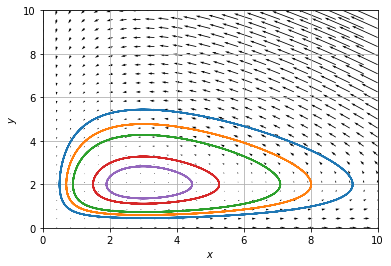

In [ ]:
# 5.2 INTERAKSI DUA SPESIES
# menggambar bidang fasa untuk sistem dengan A = [[0,-1],[1,0]] dan
# beberapa kurva solusi dengan syarat awal x(0) = 0 dan y(0) = 0, 0.5, ... , 2.5
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
#menggambar bidang fasa
x = np.linspace(0,10,25)
y = np.linspace(0,10,25)
x,y = np.meshgrid(x,y)
plt.quiver(x,y,x - (0.5*x*y),-0.75*y + 0.25*x*y)
plt.xlabel('$x$')
plt.ylabel('$y$')
#menggambar beberapa kurva solusi
def model(U,t):
    x,y = U
    dxdt = x - (0.5*x*y)
    dydt = -0.75*y + 0.25*x*y
    return [dxdt,dydt]
for i in [0.5, 0.7, 0.9, 1.5, 1.9 ]:
    tspan = np.linspace(0, 50, 2000)
    z0 = [i,2]
    ys = odeint(model, z0, tspan)
    plt.plot(ys[:, 0],ys[:, 1]);
plt.xlim([0,10])
plt.ylim([0,10])
plt.grid()
plt.show()

# # Penentuan jenis kestabilan
# A = np.array([[1,-0.5x],[0.25y,-0.75]])
# x0 =np.array([[0],[0]])

# # evaluate the eigen values 
# eigval, eigvec = np.linalg.eig(A)
# lambda1 = eigval[0]
# lambda2 = eigval[1]
# print("λ1: ",lambda1)
# print("λ2: ",lambda2)

# print("\nKarena λ1 < λ2 < 0 , maka diperoleh bidang fasa berbentuk node(simpul) stabil asimtotik")

In [ ]:
# Penentuan jenis kestabilan
A = np.array([[3,2,4],[2,0,2],[4,2,3]])
x0 =np.array([[0],[0],[0]])

# evaluate the eigen values 
eigval, eigvec = np.linalg.eig(A)
lambda1 = eigval[0]
lambda2 = eigval[1]
lambda3 = eigval[2]
print("λ1: ",lambda1)
print("λ2: ",lambda2)
print("λ3: ",lambda3)

λ1:  -1.0000000000000009
λ2:  8.0
λ3:  -0.9999999999999999


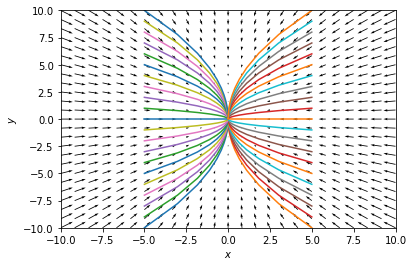

λ1:  -2.0
λ2:  -1.0

Karena λ1 < λ2 < 0 , maka diperoleh bidang fasa berbentuk node(simpul) stabil asimtotik


In [ ]:
# SOAL LATIHAN
# NOMOR 1a
# menggambar bidang fasa untuk sistem dengan A = [[-2,0],[0,-1]] dan
# beberapa kurva solusi dengan syarat awal x(0) = 0 dan y(0) = 0, 0.5, ... , 2.5
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
#menggambar bidang fasa
x = np.linspace(-10,10,25)
y = np.linspace(-10,10,25)
x,y = np.meshgrid(x,y)
plt.quiver(x,y, -2*x,-y)
plt.xlabel('$x$')
plt.ylabel('$y$')

#menggambar beberapa kurva solusi
def model(U,t):
    x,y = U
    dxdt = -2*x
    dydt = -y
    return [dxdt,dydt]
for i in range (-10,11):
    tspan = np.linspace(0, 50, 200)
    z0 = [-5,i]
    ys = odeint(model, z0, tspan)
    plt.plot(ys[:, 0],ys[:, 1]);
    z0 = [5,i]
    ys = odeint(model, z0, tspan)
    plt.plot(ys[:, 0],ys[:, 1]);
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.show()


# Penentuan jenis kestabilan
A = np.array([[-2,0],[0,-1]])
x0 =np.array([[0],[0]])

# evaluate the eigen values 
eigval, eigvec = np.linalg.eig(A)
lambda1 = eigval[0]
lambda2 = eigval[1]
print("λ1: ",lambda1)
print("λ2: ",lambda2)

print("\nKarena λ1 < λ2 < 0 , maka diperoleh bidang fasa berbentuk node(simpul) stabil asimtotik")


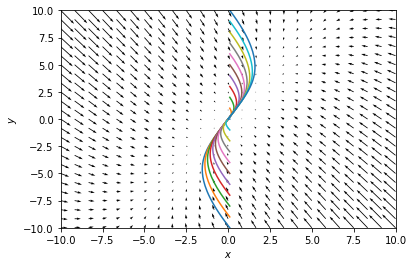

λ1:  -4.0
λ2:  -1.0

Karena λ1 < λ2 < 0 , maka diperoleh bidang fasa berbentuk node(simpul) stabil asimtotik


In [ ]:
# SOAL LATIHAN
# NOMOR 1 b
# menggambar bidang fasa untuk sistem dengan A = [[-2,0],[0,-1]] dan
# beberapa kurva solusi dengan syarat awal x(0) = 0 dan y(0) = 0, 0.5, ... , 2.5
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
#menggambar bidang fasa
x = np.linspace(-10,10,25)
y = np.linspace(-10,10,25)
x,y = np.meshgrid(x,y)
plt.quiver(x,y, -3*x + y,2*x - 2*y)
plt.xlabel('$x$')
plt.ylabel('$y$')

#menggambar beberapa kurva solusi
def model(U,t):
    x,y = U
    dxdt = -3*x + y
    dydt = 2*x - 2*y
    return [dxdt,dydt]
for i in range (-10,11):
    tspan = np.linspace(0, 50, 2000)
    z0 = [0.1,i]
    ys = odeint(model, z0, tspan)
    plt.plot(ys[:, 0],ys[:, 1]);
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.show()

# Penentuan jenis kestabilan
A = np.array([[-3,1],[2,-2]])
x0 =np.array([[0],[0]])

# evaluate the eigen values 
eigval, eigvec = np.linalg.eig(A)
lambda1 = eigval[0]
lambda2 = eigval[1]
print("λ1: ",lambda1)
print("λ2: ",lambda2)

print("\nKarena λ1 < λ2 < 0 , maka diperoleh bidang fasa berbentuk node(simpul) stabil asimtotik")

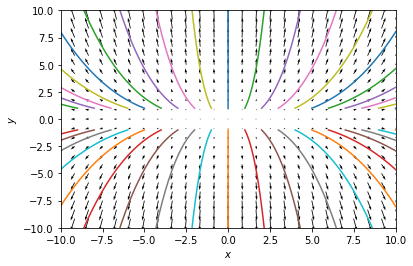

λ1:  3.0
λ2:  1.0

Karena λ1 > λ2 > 0 , maka diperoleh bidang fasa berbentuk node(simpul) tidak stabil


In [ ]:
# SOAL LATIHAN
# NOMOR 1 c
# menggambar bidang fasa untuk sistem dengan A = [[-2,0],[0,-1]] dan
# beberapa kurva solusi dengan syarat awal x(0) = 0 dan y(0) = 0, 0.5, ... , 2.5
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
#menggambar bidang fasa
x = np.linspace(-10,10,25)
y = np.linspace(-10,10,25)
x,y = np.meshgrid(x,y)
plt.quiver(x,y, x,3*y)
plt.xlabel('$x$')
plt.ylabel('$y$')

#menggambar beberapa kurva solusi
def model(U,t):
    x,y = U
    dxdt = x
    dydt = 3*y
    return [dxdt,dydt]
for i in range (-10,11):
    tspan = np.linspace(0, 50, 2000)
    z0 = [i,1]
    ys = odeint(model, z0, tspan)
    plt.plot(ys[:, 0],ys[:, 1]);
    z0 = [i,-1]
    ys = odeint(model, z0, tspan)
    plt.plot(ys[:, 0],ys[:, 1]);
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.show()

# Penentuan jenis kestabilan
A = np.array([[1,0],[0,3]])
x0 =np.array([[0],[0]])

# evaluate the eigen values 
eigval, eigvec = np.linalg.eig(A)
lambda1 = eigval[0]
lambda2 = eigval[1]
print("λ1: ",lambda2)
print("λ2: ",lambda1)

print("\nKarena λ1 > λ2 > 0 , maka diperoleh bidang fasa berbentuk node(simpul) tidak stabil")

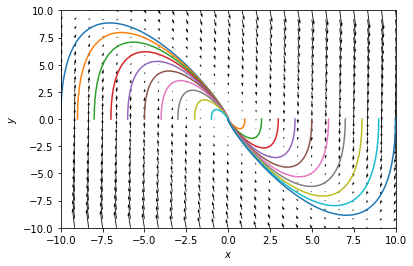

λ1:  (-2.0000000000000004+1.0000000000000004j)
λ2:  (-2.0000000000000004-1.0000000000000004j)

λ1, λ2 = α ± iβ, α < 0 , maka diperoleh bidang fasa berbentuk spiral stabil asimtotik


In [ ]:
# SOAL LATIHAN
# NOMOR 1 d
# menggambar bidang fasa untuk sistem dengan A = [[-2,0],[0,-1]] dan
# beberapa kurva solusi dengan syarat awal x(0) = 0 dan y(0) = 0, 0.5, ... , 2.5
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
#menggambar bidang fasa
x = np.linspace(-10,10,25)
y = np.linspace(-10,10,25)
x,y = np.meshgrid(x,y)
plt.quiver(x,y, y,-5*x - 4*y)
plt.xlabel('$x$')
plt.ylabel('$y$')

#menggambar beberapa kurva solusi
def model(U,t):
    x,y = U
    dxdt = y
    dydt = -5*x - 4*y
    return [dxdt,dydt]
for i in range (-10,11):
    tspan = np.linspace(0, 50, 2000)
    z0 = [i,0]
    ys = odeint(model, z0, tspan)
    plt.plot(ys[:, 0],ys[:, 1]);
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.show()


# Penentuan jenis kestabilan
A = np.array([[0,1],[-5,-4]])
x0 =np.array([[0],[0]])

# evaluate the eigen values 
eigval, eigvec = np.linalg.eig(A)
lambda1 = eigval[0]
lambda2 = eigval[1]
print("λ1: ",lambda1)
print("λ2: ",lambda2)

print("\nλ1, λ2 = α ± iβ, α < 0 , maka diperoleh bidang fasa berbentuk spiral stabil asimtotik")

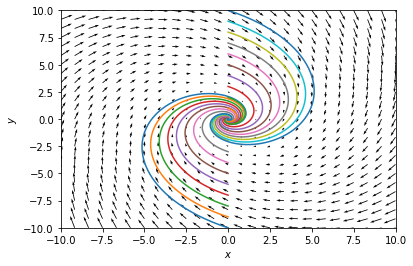

λ1:  (-0.5+1j)
λ2:  (-0.5-1j)

λ1, λ2 = α ± iβ, α < 0 , maka diperoleh bidang fasa berbentuk spiral stabil asimtotik


In [ ]:
# SOAL LATIHAN
# NOMOR 1 e
# menggambar bidang fasa untuk sistem dengan A = [[-2,0],[0,-1]] dan
# beberapa kurva solusi dengan syarat awal x(0) = 0 dan y(0) = 0, 0.5, ... , 2.5
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
#menggambar bidang fasa
x = np.linspace(-10,10,25)
y = np.linspace(-10,10,25)
x,y = np.meshgrid(x,y)
plt.quiver(x,y,-0.5*x + y,-x - 0.5*y)
plt.xlabel('$x$')
plt.ylabel('$y$')

#menggambar beberapa kurva solusi
def model(U,t):
    x,y = U
    dxdt = -0.5*x + y
    dydt = -x - 0.5*y
    return [dxdt,dydt]
for i in range (-10,11):
    tspan = np.linspace(0, 50, 2000)
    z0 = [0,i]
    ys = odeint(model, z0, tspan)
    plt.plot(ys[:, 0],ys[:, 1]);
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.show()

# Penentuan jenis kestabilan
A = np.array([[-0.5,1],[-1,-0.5]])
x0 =np.array([[0],[0]])

# evaluate the eigen values 
eigval, eigvec = np.linalg.eig(A)
lambda1 = eigval[0]
lambda2 = eigval[1]
print("λ1: ",lambda1)
print("λ2: ",lambda2)

print("\nλ1, λ2 = α ± iβ, α < 0 , maka diperoleh bidang fasa berbentuk spiral stabil asimtotik")

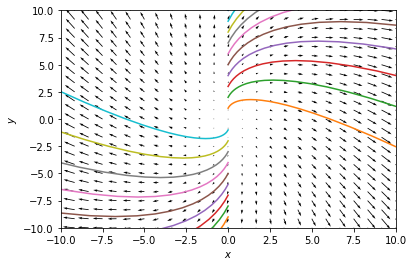

λ1:  5.0
λ2:  5.0

λ1 = λ2 > 0, maka diperoleh bidang fasa berbentuk (Im)Proper Node tidak stabil)


In [ ]:
# SOAL LATIHAN
# NOMOR 1 f
# menggambar bidang fasa untuk sistem dengan A = [[-2,0],[0,-1]] dan
# beberapa kurva solusi dengan syarat awal x(0) = 0 dan y(0) = 0, 0.5, ... , 2.5
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
#menggambar bidang fasa
x = np.linspace(-10,10,25)
y = np.linspace(-10,10,25)
x,y = np.meshgrid(x,y)
plt.quiver(x,y,7*x + y,-4*x + 3*y)
plt.xlabel('$x$')
plt.ylabel('$y$')

#menggambar beberapa kurva solusi
def model(U,t):
    x,y = U
    dxdt = 7*x + y
    dydt = -4*x + 3*y
    return [dxdt,dydt]
for i in range (-10,11):
    tspan = np.linspace(0, 50, 2000)
    z0 = [0,i]
    ys = odeint(model, z0, tspan)
    plt.plot(ys[:, 0],ys[:, 1]);
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.show()

# Penentuan jenis kestabilan
A = np.array([[7,1],[-4,3]])
x0 =np.array([[0],[0]])

# evaluate the eigen values 
eigval, eigvec = np.linalg.eig(A)
lambda1 = eigval[0]
lambda2 = eigval[1]
print("λ1: ",lambda1)
print("λ2: ",lambda2)

print("\nλ1 = λ2 > 0, maka diperoleh bidang fasa berbentuk (Im)Proper Node tidak stabil)")

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


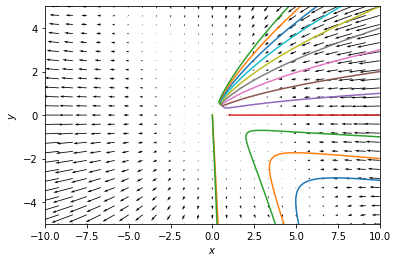

Titik kesetimbangan berada di x,y yaitu (0,0) dan (0.5, 0.5)


In [ ]:
# SOAL LATIHAN
# NOMOR 2a
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
#menggambar bidang fasa
x = np.linspace(-10,10,25)
y = np.linspace(-5,5,25)
x,y = np.meshgrid(x,y)
plt.quiver(x,y, x*(1 - x - y), y*(0.75 - y - 0.5*x))
plt.xlabel('$x$')
plt.ylabel('$y$')
 
#menggambar beberapa kurva solusi
def model(U,t):
    x,y = U
    dxdt = x*(1 - x - y)
    dydt = y*(0.75 - y - 0.5*x)
    return [dxdt,dydt]
for i in range (-3,10):
    tspan = np.linspace(0, 50, 2000)
    z0 = [10,i]
    ys = odeint(model, z0, tspan)
    plt.plot(ys[:, 0],ys[:, 1]);
plt.xlim([-10,10])
plt.ylim([-5,5])
plt.show()

print("Titik kesetimbangan berada di x,y yaitu (0,0) dan (0.5, 0.5)")

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/usr/local/lib/pytho

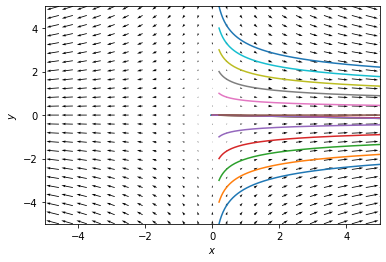

In [ ]:
# SOAL LATIHAN
# NOMOR 2b
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
#menggambar bidang fasa
x = np.linspace(-5,5,25)
y = np.linspace(-5,5,25)
x,y = np.meshgrid(x,y)
plt.quiver(x,y, 2*x*(1 - 0.0001*x - 0.005*y),y*(-0.5 + 0.0001*x))
plt.xlabel('$x$')
plt.ylabel('$y$')
 
#menggambar beberapa kurva solusi
def model(U,t):
    x,y = U
    dxdt = 2*x*(1 - 0.0001*x - 0.005*y)
    dydt = y*(-0.5 + 0.0001*x)
    return [dxdt,dydt]
for i in range (-5,6):
    tspan = np.linspace(0, 50, 2000)
    z0 = [0.2,i]
    ys = odeint(model, z0, tspan)
    plt.plot(ys[:, 0],ys[:, 1]);
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.show()

print("Titik kesetimbangan berada di x,y yaitu (0,0), (10000, 0) dan (5000, 100)")

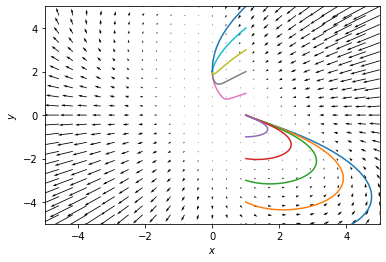

In [ ]:
# SOAL LATIHAN
# NOMOR 2c
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
#menggambar bidang fasa
x = np.linspace(-5,5,25)
y = np.linspace(-5,5,25)
x,y = np.meshgrid(x,y)
plt.quiver(x,y, x*(1 - x - y), y*(0.5 - 0.25*y - 0.75*x))
plt.xlabel('$x$')
plt.ylabel('$y$')
 
#menggambar beberapa kurva solusi
def model(U,t):
    x,y = U
    dxdt = x*(1 - x - y)
    dydt = y*(0.5 - 0.25*y - 0.75*x)
    return [dxdt,dydt]
for i in range (-5,6):
    tspan = np.linspace(0, 50, 2000)
    z0 = [1,i]
    ys = odeint(model, z0, tspan)
    plt.plot(ys[:, 0],ys[:, 1]);
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.show()

print("Titik kesetimbangan berada di x,y yaitu (0,0) dan (0.5, 0.5)")

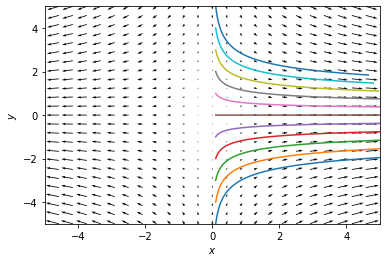

In [ ]:
# SOAL LATIHAN
# NOMOR 2d
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
#menggambar bidang fasa
x = np.linspace(-5,5,25)
y = np.linspace(-5,5,25)
x,y = np.meshgrid(x,y)
plt.quiver(x, y, 0.08*x*(1 - 0.0002*x) - 0.001*x*y, -0.02*y + 0.00002*x*y)
plt.xlabel('$x$')
plt.ylabel('$y$')
 
#menggambar beberapa kurva solusi
def model(U,t):
    x,y = U
    dxdt = 0.08*x*(1 - 0.0002*x) - 0.001*x*y
    dydt = -0.02*y + 0.00002*x*y
    return [dxdt,dydt]
for i in range (-5,6):
    tspan = np.linspace(0, 50, 2000)
    z0 = [0.1,i]
    ys = odeint(model, z0, tspan)
    plt.plot(ys[:, 0],ys[:, 1]);
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.show()

print("Titik kesetimbangan berada di x,y yaitu (0,0), (5000, 0) dan (1000, 64")